In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
normal_directory_path = '/content/drive/MyDrive/Dummy-Dataset/Archive/train/NORMAL'
pneumonia_directory_path = '/content/drive/MyDrive/Dummy-Dataset/Archive/train/PNEUMONIA'
normal_files = os.listdir(normal_directory_path)
pneumonia_files = os.listdir(pneumonia_directory_path)

print('Normal images count = ', len(normal_files))
print('Pneumonia images count = ', len(pneumonia_files))

Normal images count =  1341
Pneumonia images count =  3875


In [23]:
Normal_label = [0]*len(normal_files)
Pneumonia_label = [1]*len(pneumonia_files)

All_labels = Normal_label + Pneumonia_label
print(len(Normal_label), len(Pneumonia_label), len(All_labels))

1341 3875 5216


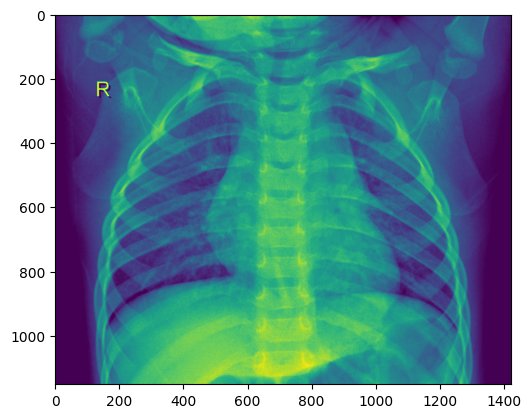

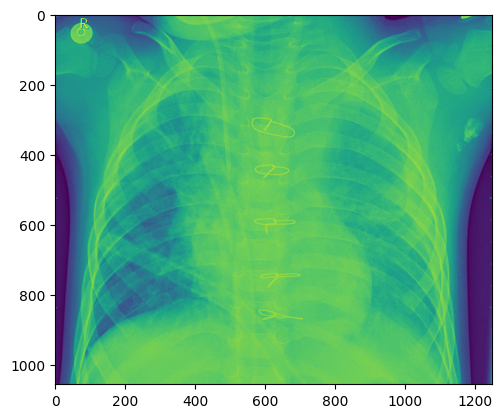

In [20]:
normal_image =  mpimg.imread(os.path.join(normal_directory_path,'IM-0117-0001.jpeg'))
pneumonia_image = mpimg.imread(os.path.join(pneumonia_directory_path,'person3_bacteria_10.jpeg'))

plt.imshow(normal_image)
plt.show()

plt.imshow(pneumonia_image)
plt.show()


**Image Processing**

In [22]:
data = []

for img_file in normal_files:
    image=Image.open(normal_directory_path +'/'+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

for img_file in pneumonia_files:
    image=Image.open(pneumonia_directory_path+'/' +img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

type(data)
len(data)

5216

**Data Conversion to NumPy Arrays and Train-Test Split**

In [32]:
X = np.array(data)
Y = np.array(All_labels)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

**Data Scaling**

In [33]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

**Model Definition**

In [94]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

**Model Compilation**

In [95]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

**Model Training**

In [96]:
history = model.fit(X_train_scaled,Y_train, validation_split = 0.1, verbose = 1, epochs = 5)

Epoch 1/5
118/118 [==============================] - 280s 2s/step - loss: 0.3199 - acc: 0.8785 - val_loss: 0.1572 - val_acc: 0.9498
Epoch 2/5
118/118 [==============================] - 279s 2s/step - loss: 0.1445 - acc: 0.9513 - val_loss: 0.1471 - val_acc: 0.9474
Epoch 3/5
118/118 [==============================] - 273s 2s/step - loss: 0.1194 - acc: 0.9555 - val_loss: 0.1259 - val_acc: 0.9641
Epoch 4/5
118/118 [==============================] - 277s 2s/step - loss: 0.0871 - acc: 0.9656 - val_loss: 0.1351 - val_acc: 0.9593
Epoch 5/5
118/118 [==============================] - 271s 2s/step - loss: 0.0741 - acc: 0.9696 - val_loss: 0.1506 - val_acc: 0.9593


**Accuracy**

In [97]:
loss,accuracy=model.evaluate(X_test_scaled, Y_test)

33/33 [==============================] - 19s 566ms/step - loss: 0.1020 - acc: 0.9674


**Testing with Test Images**

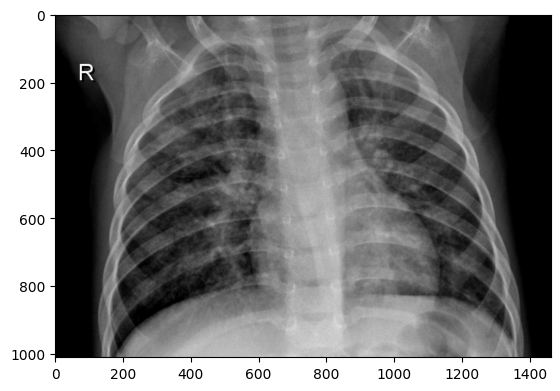

1/1 [==============================] - 0s 113ms/step
Prediction Probabilities: [[0.05424246 0.94268656]]
Pneumonia


In [98]:
image = cv2.imread('/content/drive/MyDrive/Dummy-Dataset/Archive/test/PNEUMONIA/person19_virus_50.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (128, 128))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 128, 128, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if predicted_label == 1:
  print('Pneumonia')
else:
  print('Normal')

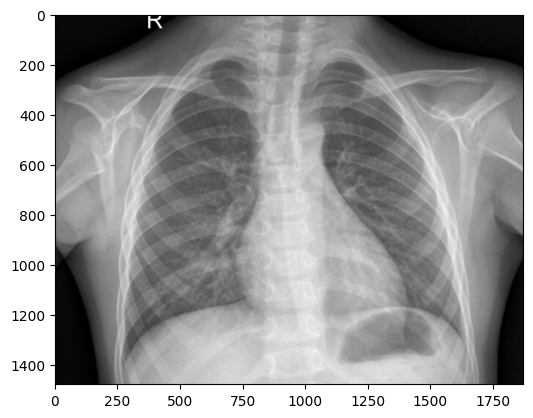

1/1 [==============================] - 0s 46ms/step
Prediction Probabilities: [[0.925666   0.03933322]]
Normal


In [99]:
image = cv2.imread('/content/drive/MyDrive/Dummy-Dataset/Archive/test/NORMAL/IM-0010-0001.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (128, 128))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 128, 128, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if predicted_label == 1:
  print('Pneumonia')
else:
  print('Normal')

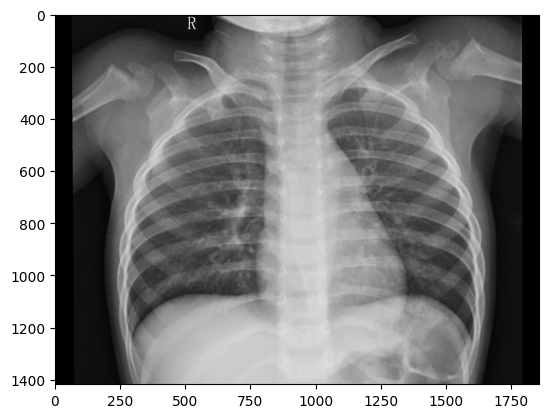

1/1 [==============================] - 0s 61ms/step
Prediction Probabilities: [[0.9801183  0.00773886]]
Normal


In [100]:
image = cv2.imread('/content/drive/MyDrive/Dummy-Dataset/Archive/test/NORMAL/NORMAL2-IM-0027-0001.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (128, 128))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 128, 128, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if predicted_label == 1:
  print('Pneumonia')
else:
  print('Normal')

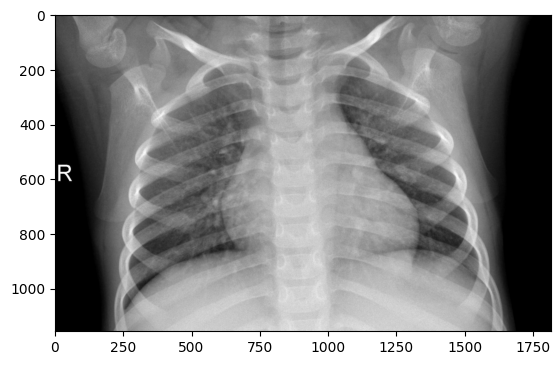

1/1 [==============================] - 0s 44ms/step
Prediction Probabilities: [[0.7028457  0.25942054]]
Normal


In [101]:
image = cv2.imread('/content/drive/MyDrive/Dummy-Dataset/Archive/test/NORMAL/NORMAL2-IM-0301-0001.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (128, 128))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 128, 128, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if predicted_label == 1:
  print('Pneumonia')
else:
  print('Normal')

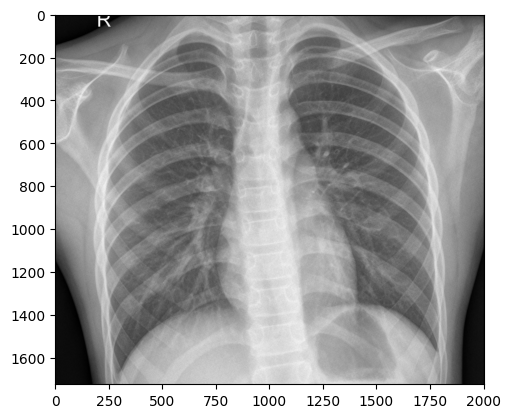

1/1 [==============================] - 0s 67ms/step
Prediction Probabilities: [[0.09831987 0.89789534]]
Pneumonia


In [102]:
image = cv2.imread('/content/drive/MyDrive/Dummy-Dataset/Archive/test/NORMAL/IM-0046-0001.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (128, 128))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 128, 128, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if predicted_label == 1:
  print('Pneumonia')
else:
  print('Normal')

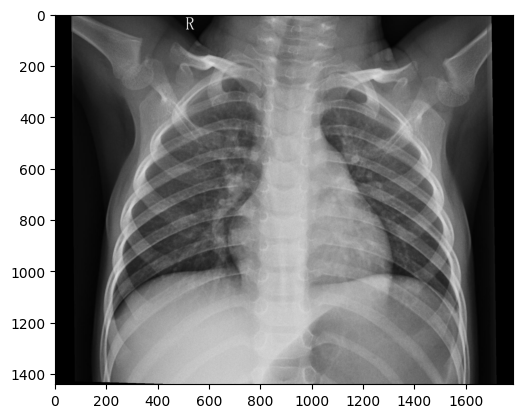

1/1 [==============================] - 0s 45ms/step
Prediction Probabilities: [[0.9626601  0.02098622]]
Normal


In [103]:
image = cv2.imread('/content/drive/MyDrive/Dummy-Dataset/Archive/test/NORMAL/NORMAL2-IM-0012-0001.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (128, 128))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 128, 128, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if predicted_label == 1:
  print('Pneumonia')
else:
  print('Normal')